<a href="https://colab.research.google.com/github/oncejhonceasar/projects/blob/main/Coffee%20Sales%20Analysis%3A%20Trends%20and%20Insights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

jhonceasaronce_coffee_path = kagglehub.dataset_download('jhonceasaronce/coffee')

print('Data source import complete.')


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/coffee-dataset/index.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Coffee Data Analysis: Initial Exploration and Pre-processing

In [ ]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('/kaggle/input/coffee/index.csv', encoding='ascii')

# Preview head of the dataframe
print('Head of the dataframe:')
print(df.head())

# Check info and missing values
print('\
DataFrame info:')
print(df.info())

# Describe numeric columns to check for anomalies
print('\
Numeric column summary:')
print(df.describe())

# Checking for missing values:
print('\
Missing values in each column:')
print(df.isnull().sum())

# Additional anomaly checks: Unique values in certain columns
print('\
Unique cash_type values:')
print(df['cash_type'].unique())

print('\
Unique coffee_name values:')
print(df['coffee_name'].unique())

print('Data pre-processing complete.')

Head of the dataframe:
         date                 datetime cash_type                 card  money  \
0  2024-03-01  2024-03-01 10:15:50.520      card  ANON-0000-0000-0001   38.7   
1  2024-03-01  2024-03-01 12:19:22.539      card  ANON-0000-0000-0002   38.7   
2  2024-03-01  2024-03-01 12:20:18.089      card  ANON-0000-0000-0002   38.7   
3  2024-03-01  2024-03-01 13:46:33.006      card  ANON-0000-0000-0003   28.9   
4  2024-03-01  2024-03-01 13:48:14.626      card  ANON-0000-0000-0004   38.7   

     coffee_name  
0          Latte  
1  Hot Chocolate  
2  Hot Chocolate  
3      Americano  
4          Latte  
DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1060 entries, 0 to 1059
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1060 non-null   object 
 1   datetime     1060 non-null   object 
 2   cash_type    1060 non-null   object 
 3   card         971 non-null    object 
 4   mon

# Handling Missing Data in 'card' Column

In [ ]:
# Fill missing values in the 'card' column with 'Unknown'
df['card'].fillna('Unknown', inplace=True)

# Verify that there are no more missing values in the 'card' column
print('Missing values in each column after handling missing data:')
print(df.isnull().sum())

print('Missing values in the card column have been filled with "Unknown".')

Missing values in each column after handling missing data:
date           0
datetime       0
cash_type      0
card           0
money          0
coffee_name    0
dtype: int64
Missing values in the card column have been filled with "Unknown".


<ipython-input-6-8dff600faac6>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['card'].fillna('Unknown', inplace=True)


# Coffee Order Trends: Most Popular Choices Among Customers

Sales Analysis by Coffee Type:
                     count      sum   mean
coffee_name                               
Americano with Milk    242  7876.02  32.55
Latte                  229  8549.66  37.33
Cappuccino             187  7037.76  37.64
Americano              162  4483.40  27.68
Cortado                 92  2583.94  28.09
Hot Chocolate           72  2712.84  37.68
Espresso                44  1010.02  22.96
Cocoa                   32  1197.48  37.42


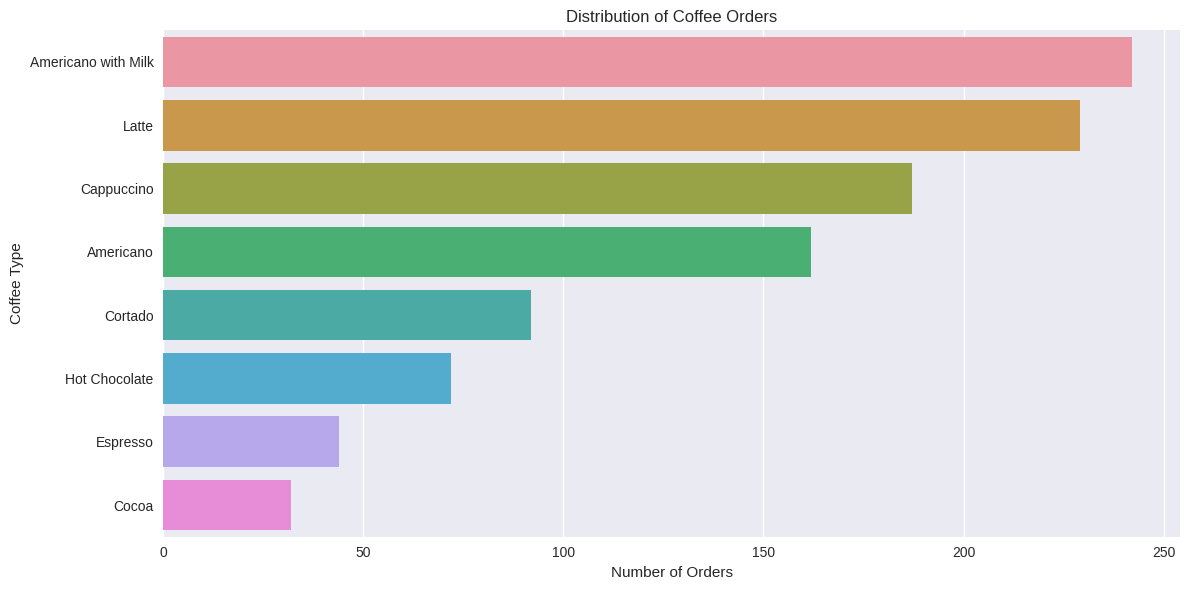

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Set the style
plt.style.use('seaborn-v0_8')

# Convert datetime column to datetime type if not already
df['datetime'] = pd.to_datetime(df['datetime'])

# 1. Sales by Coffee Type
coffee_sales = df.groupby('coffee_name')['money'].agg(['count', 'sum', 'mean']).round(2)
coffee_sales = coffee_sales.sort_values('count', ascending=False)

print('Sales Analysis by Coffee Type:')
print(coffee_sales)

# Visualization 1: Coffee Type Distribution
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='coffee_name', order=df['coffee_name'].value_counts().index)
plt.title('Distribution of Coffee Orders')
plt.xlabel('Number of Orders')
plt.ylabel('Coffee Type')
plt.tight_layout()
plt.show()

# Insights:
This chart shows which coffee drinks are ordered the most.

1. Americano with Milk is the Most Popular – This drink has the highest number of orders, meaning customers prefer a milder Americano with added milk.
2. Latte and Cappuccino are also Top Choices – These drinks are also widely ordered, indicating that people enjoy milk-based coffee.
3. Classic Americano is in the Middle – Some customers still prefer a strong black coffee, but it’s not as popular as the milkier options.
4. Espresso and Cocoa are the Least Ordered – Strong and small espresso shots or hot chocolate drinks are less popular choices.

# Payment Method Distribution Chart

Payment Method Analysis:
           count       sum   mean
cash_type                        
card         971  32265.12  33.23
cash          89   3186.00  35.80


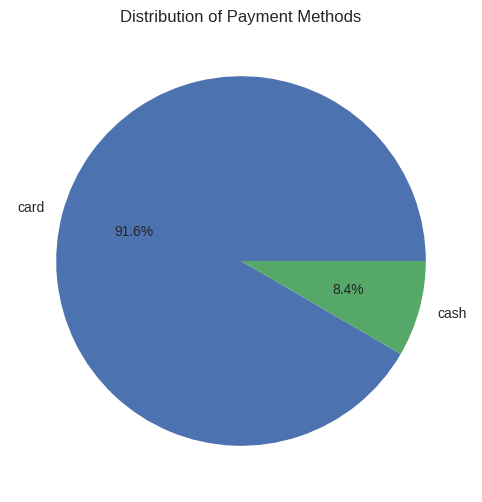

In [ ]:
payment_analysis = df.groupby('cash_type')['money'].agg(['count', 'sum', 'mean']).round(2)
print('\
Payment Method Analysis:')
print(payment_analysis)

# Visualization 3: Payment Method Distribution
plt.figure(figsize=(8, 6))
df['cash_type'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Payment Methods')
plt.ylabel('')
plt.show()

# Insights
* Card Payments Dominate – Around 91.6% of transactions are made using a card (credit/debit). This suggests that most customers prefer cashless payments, possibly for convenience, rewards, or security.
* Cash is Used Less Often – Only 8.4% of payments are made with cash, indicating a shift towards digital transactions.

# What This Means for the Business
* Ensure Smooth Card Transactions – Since most customers pay with a card, maintaining efficient card payment systems (POS terminals, online payment options) is crucial.
* Consider Going Cashless – If trends continue, the business might reduce cash handling costs and focus on digital payments.
* Cater to All Customers – While cash use is low, it’s still important to have a cash payment option for customers who prefer or need it.

# Orders Throughout the Day Chart

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


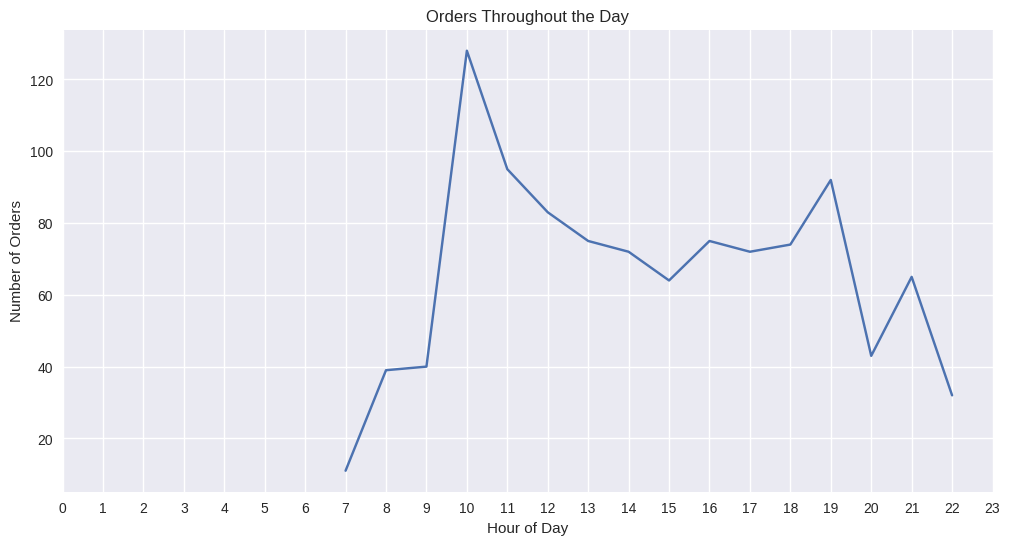

In [ ]:
df['hour'] = df['datetime'].dt.hour
hourly_sales = df.groupby('hour')['money'].agg(['count', 'sum']).round(2)

plt.figure(figsize=(12, 6))
sns.lineplot(x=hourly_sales.index, y=hourly_sales['count'])
plt.title('Orders Throughout the Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Orders')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()


# Insights
* Morning Peak (Around 10 AM) – The highest number of orders happens around 10 AM, indicating a strong demand for coffee during the morning rush, likely from people starting their workday.
* Gradual Decline After Morning Peak – Orders start dropping after 10 AM, but coffee demand remains steady through lunchtime.
* Afternoon and Evening Activity – There’s a second smaller peak around 7 PM, suggesting that some customers still grab coffee in the evening, possibly for social meetings or late work sessions.
* Low Orders Late at Night– After 8 PM, the number of orders drops significantly, which is expected as fewer people consume coffee late at night.

# What This Means for the Business
* Staffing and Inventory Planning – More staff and stock are needed during the morning rush (7 AM - 11 AM) to handle peak demand efficiently.
* Targeted Promotions – Afternoon and evening hours could benefit from promotions to attract more customers during slower periods.
* Operational Efficiency – If late-night orders are consistently low, the business might consider closing earlier or reducing staff during those hours to cut costs.

# Total Revenue Over Dates Chart

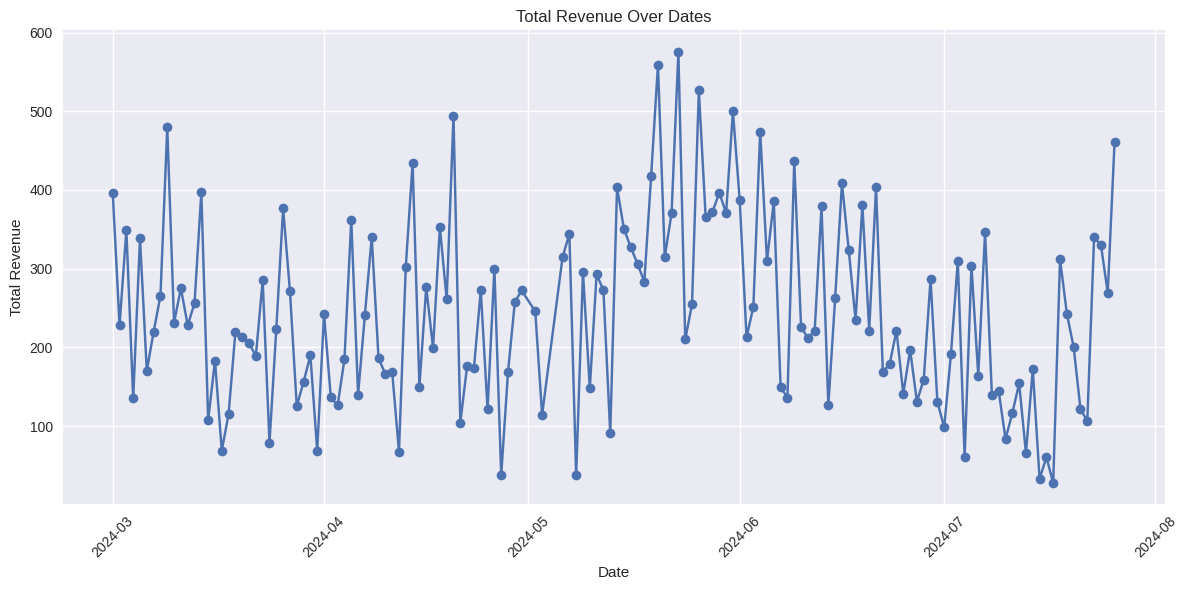

In [ ]:
df['date_only'] = df['datetime'].dt.date
revenue_by_date = df.groupby('date_only')['money'].sum()

plt.figure(figsize=(12, 6))
revenue_by_date.plot(kind='line', marker='o')
plt.title('Total Revenue Over Dates')
plt.xlabel('Date')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Insights
* Fluctuating Revenue – The total revenue varies significantly across dates, showing multiple peaks and dips.
* Growth Around May to June – A noticeable increase in revenue occurs around May and June, suggesting a period of high sales.
* Decline in July – Revenue starts dropping in July, possibly due to seasonal factors, reduced demand, or external factors like weather or holidays.
* Recent Recovery – Towards the end of the chart, revenue appears to be increasing again, indicating a potential rebound.

# What This Means for the Business
* Identify High & Low Seasons – Understanding revenue trends helps in planning promotions or special events to maintain steady sales.
* Investigate Factors – The business should analyze why revenue peaked in May-June and why it dropped in July—external events, marketing efforts, or customer behavior might be key factors.
* Strategic Planning – If seasonality is a factor, the business can introduce discounts or promotions during slower months to boost revenue.

# Distribution of Order Values Chart

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


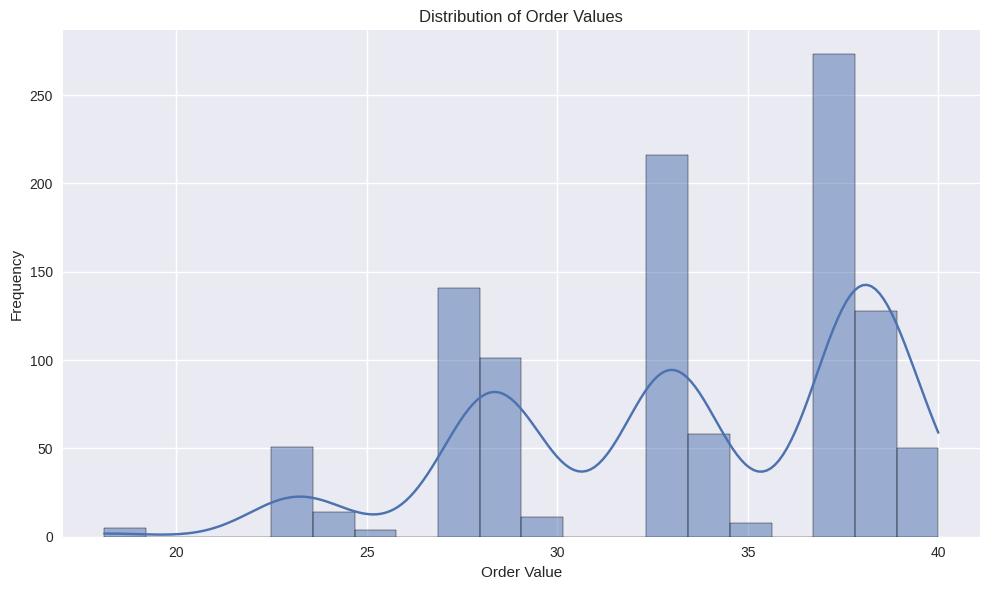

In [ ]:
# Additional Insight 3: Histogram of order values
plt.figure(figsize=(10, 6))
sns.histplot(df['money'], bins=20, kde=True)
plt.title('Distribution of Order Values')
plt.xlabel('Order Value')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Insights
* Order Values are Clustered – The histogram shows that most order values fall within a specific range, with peaks around $28, $32, $35, and $39.
* Multiple Peaks (Multimodal Distribution) – The presence of multiple peaks suggests different customer spending behaviors, possibly due to different product categories or promotions.
* Few Low-Value Orders – Orders below $20 are rare, indicating that customers tend to spend above this amount.

# What This Means for the Business
* Optimize Pricing Strategy – The common order values suggest potential price points that customers are comfortable with. * The business could create bundles or discounts around these values.
* Understand Buying Patterns – The multiple peaks indicate distinct customer groups—perhaps budget-conscious buyers and premium buyers.
* Encourage Higher Spending – If most customers spend around $35-$40, promotions like “spend $40 and get a discount” might help increase order values.

# Revenue by Coffee Type Chart

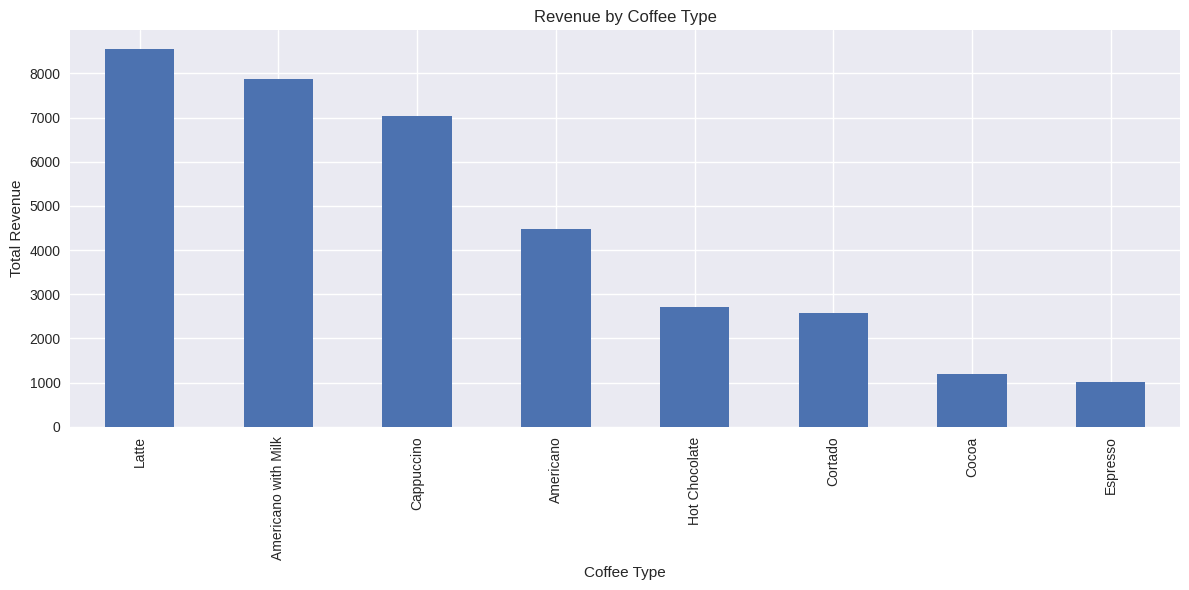

In [ ]:
revenue_by_coffee = df.groupby('coffee_name')['money'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
revenue_by_coffee.plot(kind='bar')
plt.title('Revenue by Coffee Type')
plt.xlabel('Coffee Type')
plt.ylabel('Total Revenue')
plt.tight_layout()
plt.show()

# Insights
* Latte is the Top Seller – The highest revenue comes from Latte, followed closely by Americano with Milk and Cappuccino. These drinks are likely the most popular choices among customers.
* Espresso and Cocoa Generate the Least Revenue – These items contribute the least to overall sales, possibly due to lower demand or lower pricing.
* Americano and Hot Chocolate are Mid-Tier Performers – These drinks generate moderate revenue but are significantly lower than the top three.

# What This Means for the Business
* Focus on Best-Sellers – Since Latte, Americano with Milk, and Cappuccino drive the most revenue, promotions and loyalty programs should emphasize these drinks.
* Boost Lower-Selling Items – Consider special offers or bundling Espresso and Cocoa with other items to increase sales.
* Seasonal and Upsell Strategies – Hot Chocolate sales could be improved with seasonal promotions, and Americano drinkers might be upsold with milk-based variations.

# Coffee Order Patterns Throughout the Day Chart

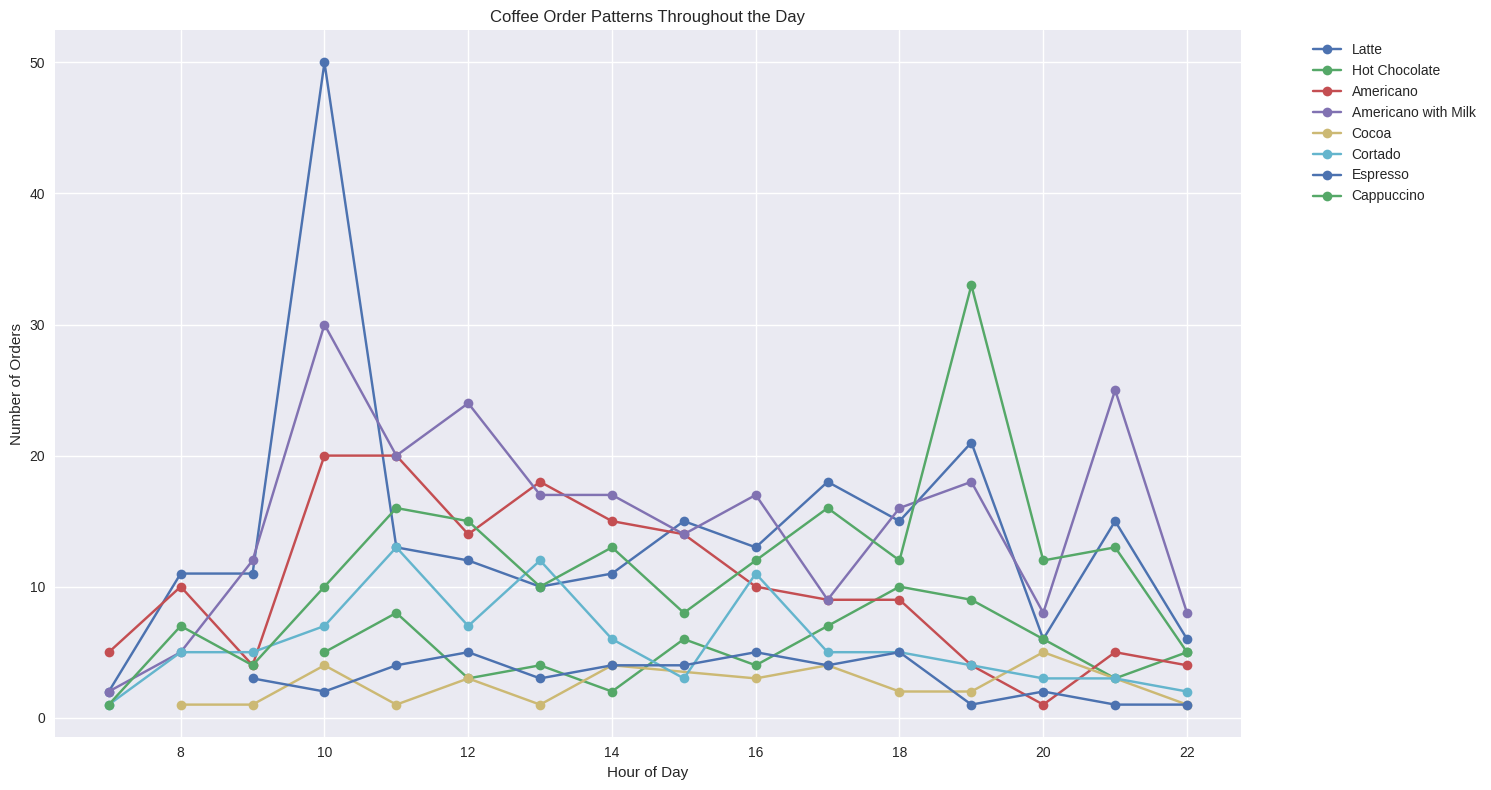

Peak ordering hours for each coffee type:
Latte: 10:00 hours
Hot Chocolate: 18:00 hours
Americano: 10:00 hours
Americano with Milk: 10:00 hours
Cocoa: 20:00 hours
Cortado: 11:00 hours
Espresso: 12:00 hours
Cappuccino: 19:00 hours


<Figure size 1200x600 with 0 Axes>

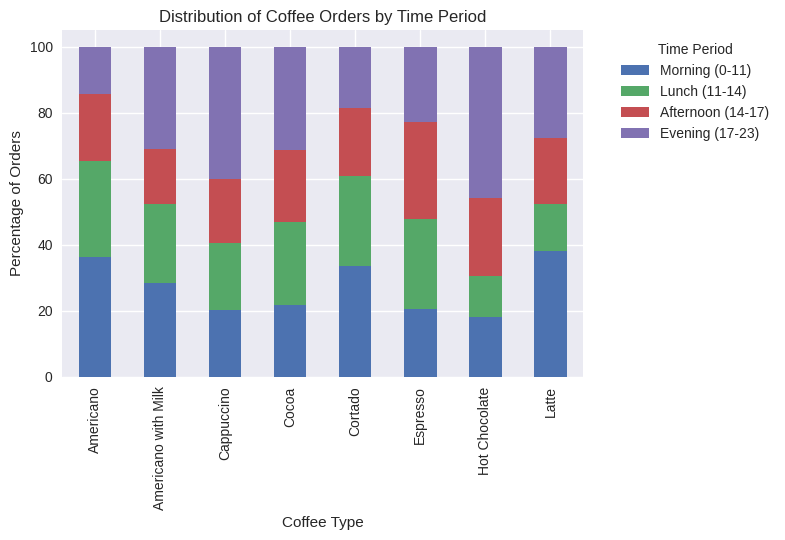

In [ ]:
# Create hourly patterns for each coffee type
plt.figure(figsize=(15, 8))
for coffee in df['coffee_name'].unique():
    coffee_data = df[df['coffee_name'] == coffee]
    hourly_count = coffee_data.groupby('hour')['coffee_name'].count()
    plt.plot(hourly_count.index, hourly_count.values, label=coffee, marker='o')

plt.title('Coffee Order Patterns Throughout the Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Orders')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# Calculate peak hours for each coffee type
peak_hours = {}
for coffee in df['coffee_name'].unique():
    coffee_data = df[df['coffee_name'] == coffee]
    peak_hour = coffee_data.groupby('hour')['coffee_name'].count().idxmax()
    peak_hours[coffee] = peak_hour

print('\
Peak ordering hours for each coffee type:')
for coffee, hour in peak_hours.items():
    print(f'{coffee}: {hour}:00 hours')

# Calculate percentage of each coffee type by time period
df['time_period'] = pd.cut(df['hour'],
                          bins=[0, 11, 14, 17, 23],
                          labels=['Morning (0-11)', 'Lunch (11-14)', 'Afternoon (14-17)', 'Evening (17-23)'])

time_period_distribution = pd.crosstab(df['coffee_name'], df['time_period'], normalize='index') * 100

plt.figure(figsize=(12, 6))
time_period_distribution.plot(kind='bar', stacked=True)
plt.title('Distribution of Coffee Orders by Time Period')
plt.xlabel('Coffee Type')
plt.ylabel('Percentage of Orders')
plt.legend(title='Time Period', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

# Key Observations
1. Morning Rush (8 AM - 10 AM)
* Latte and Americano with Milk see the highest spike at 9 AM, with over 50 orders for Latte.
* Other drinks like Americano and Cappuccino also show an increase, indicating that morning hours are the busiest time for coffee sales.

2. Midday Consumption (11 AM - 3 PM)
* Orders stabilize after the morning rush but remain moderate for Americano, Cappuccino, and Americano with Milk.
* Latte demand significantly drops after 10 AM, likely due to customers already having their morning caffeine fix.

3. Evening Spikes (6 PM - 9 PM)
* A secondary peak is visible around 7 PM and 8 PM, particularly for Cappuccino and Americano with Milk.
* This could be due to customers grabbing an evening coffee break or social meetups.

4. Low Demand for Cocoa and Espresso
* These drinks remain consistently low in demand throughout the day.
* Cocoa may be more of a seasonal drink, and Espresso might be preferred in specific situations rather than as a daily staple.

# Business Implications
* Morning Promotions – Offer bundle deals or discounts on Latte and Americano with Milk during peak hours to maximize revenue.
* Afternoon Engagement – Consider marketing strategies to boost sales between 11 AM - 3 PM, such as limited-time specials.
* Evening Strategy – The evening surge for Cappuccino and Americano with Milk suggests an opportunity for marketing towards dine-in customers or relaxing coffee breaks.